<a href="https://colab.research.google.com/github/sayarghoshroy/relevance-paradox/blob/main/paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data plots to showcase paradoxes in processed natural language data

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
location = 'drive/My Drive/relevance-paradox_data/'

In [4]:
scores = []
lengths = []
content_ratios = []
similarity = []

with open(location + 'scores_2k.json') as f:
    scores = json.load(f)

with open(location + 'lengths_2k.json') as f:
    lengths = json.load(f)

with open(location + 'content_ratios_2k.json') as f:
    content_ratios = json.load(f)

with open(location + 'similarity_2k.json') as f:
    similarity = json.load(f)

In [5]:
# Setting Consistent Checking Ranges

min_len = 1
max_len = 100

min_score = 0.05
max_score = 0.95

min_cont = 0.05
max_cont = 0.95

min_similarity = 0.05
max_similarity = 0.95

In [6]:
def make_consistent():
    global scores
    global lengths
    global similarity
    global content_ratios

    cons_score = []
    cons_len = []
    cons_sim = []
    cons_cont = []

    for index in range(len(scores)):
        if scores[index] < min_score or scores[index] > max_score:
            continue
        if lengths[index] < min_len or lengths[index] > max_len:
            continue
        if similarity[index] < min_similarity or similarity[index] > max_similarity:
            continue
        if content_ratios[index] < min_cont or content_ratios[index] > max_cont:
            continue
        # Appends Ensuring Atomicity
        cons_score.append(scores[index])
        cons_len.append(lengths[index] / 100)
        cons_sim.append(similarity[index])
        cons_cont.append(content_ratios[index])

    # Setter Function
    scores = cons_score
    lengths = cons_len
    similarity = cons_sim
    content_ratios = cons_cont

In [7]:
make_consistent()

## Preliminary Studies

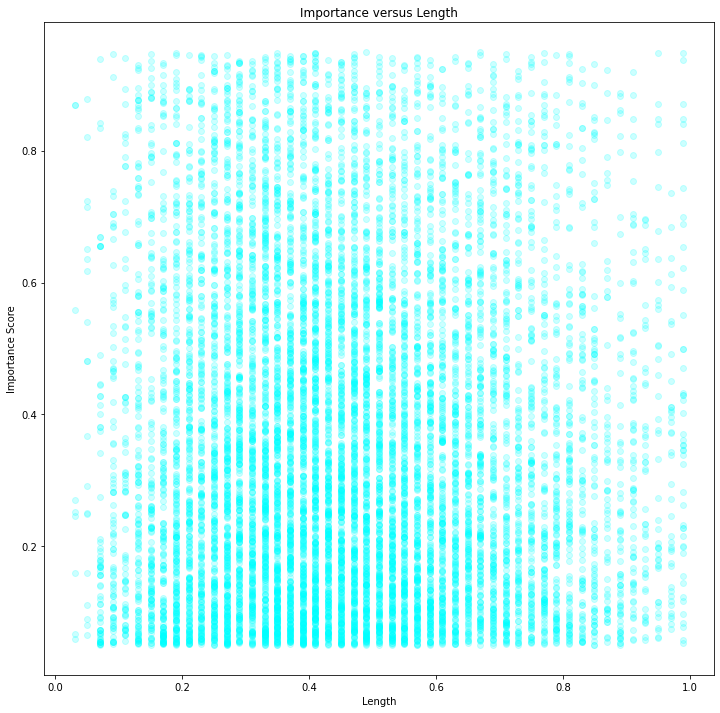

In [8]:
# Study: Importance versus Length
fig = plt.figure(figsize = (12, 12))
p = fig.add_subplot(111)
p.set_title('Importance versus Length')
p.set_xlabel('Length')
p.set_ylabel('Importance Score')
p.scatter(lengths, scores, color = 'cyan', marker = 'o', alpha = 0.2)
plt.savefig('importance_vs_length.png')
plt.show()

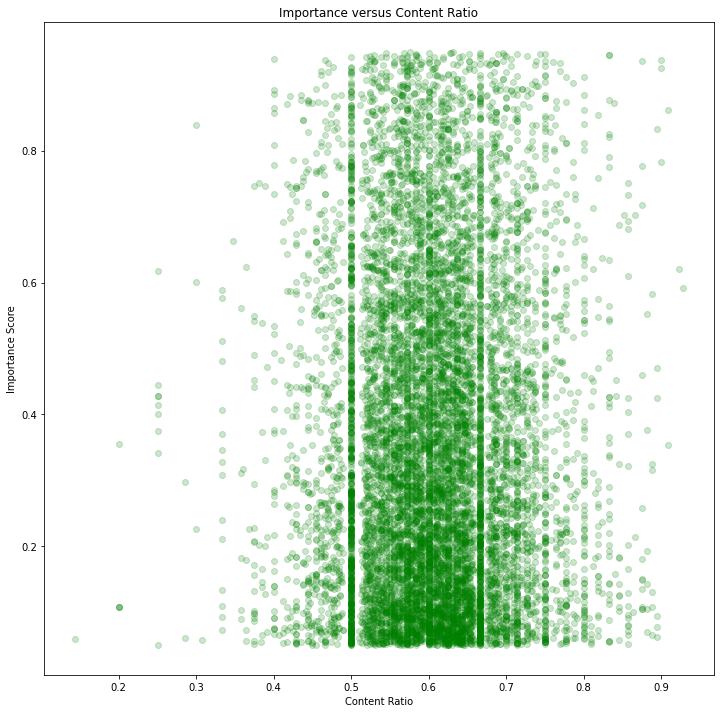

In [9]:
# Study: Importance versus Content Ratios
fig = plt.figure(figsize = (12, 12))
p = fig.add_subplot(111)
p.set_title('Importance versus Content Ratio')
p.set_xlabel('Content Ratio')
p.set_ylabel('Importance Score')
p.scatter(content_ratios, scores, color = 'green', marker = 'o', alpha = 0.2)
plt.savefig('importance_vs_content.png')
plt.show()

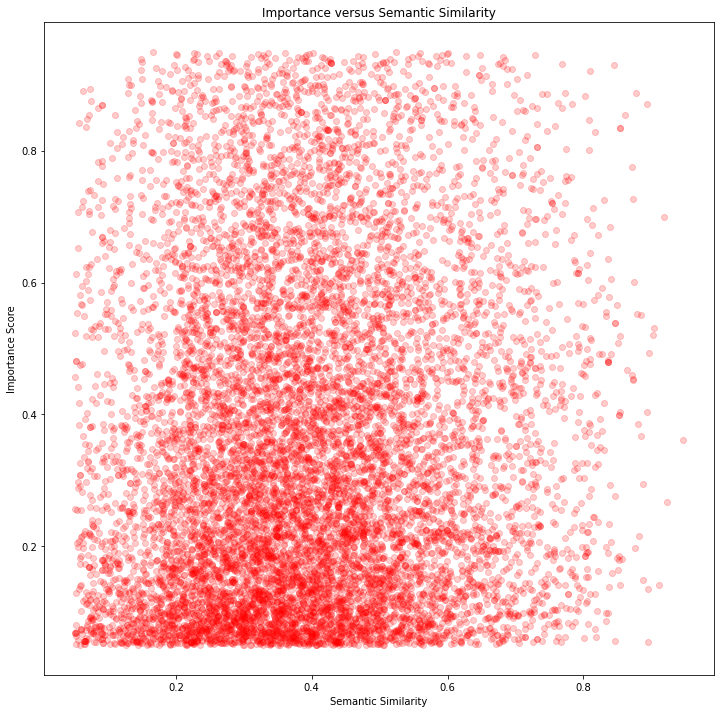

In [10]:
# Study: Importance versus Semantic Similarity
fig = plt.figure(figsize = (12, 12))
p = fig.add_subplot(111)
p.set_title('Importance versus Semantic Similarity')
p.set_xlabel('Semantic Similarity')
p.set_ylabel('Importance Score')
p.scatter(similarity, scores, color = 'red', marker = 'o', alpha = 0.2)
plt.savefig('importance_vs_similarity.png')
plt.show()

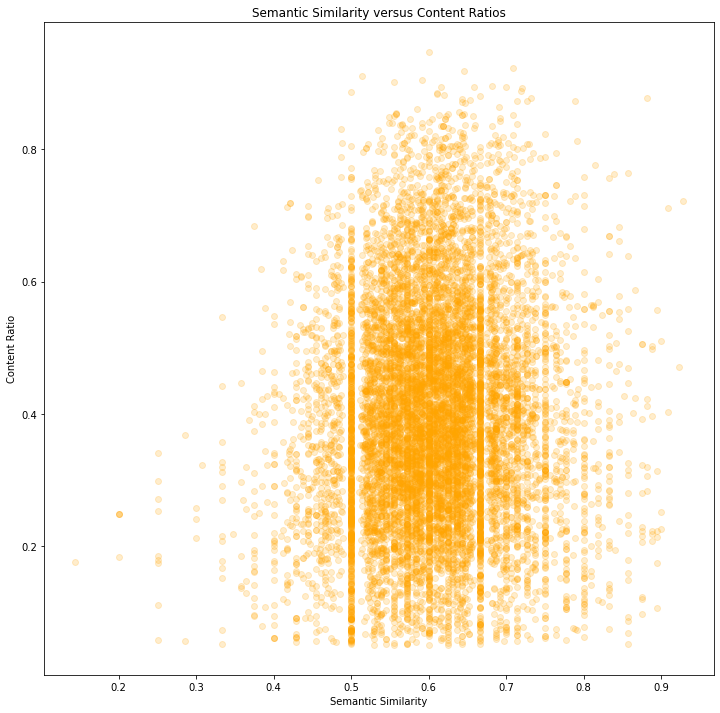

In [11]:
# Study: Semantic Similarity versus Content Ratios
fig = plt.figure(figsize = (12, 12))
p = fig.add_subplot(111)
p.set_title('Semantic Similarity versus Content Ratios')
p.set_xlabel('Semantic Similarity')
p.set_ylabel('Content Ratio')
p.scatter(content_ratios, similarity, color = 'orange', marker = 'o', alpha = 0.2)
plt.savefig('content_vs_similarity.png')
plt.show()

In [12]:
def make_plot(x_list, y_list, comp_list, x_name, y_name, comp_name):
    x = {'a': [], 'b': [], 'c': [], 'd': []}
    y = {'a': [], 'b': [], 'c': [], 'd': []}

    for index in range(len(comp_list)):
        if comp_list[index] < 0.25:
            x['a'].append(x_list[index])
            y['a'].append(y_list[index])
        elif comp_list[index] >= 0.25 and comp_list[index] < 0.5:
            x['b'].append(x_list[index])
            y['b'].append(y_list[index])
        elif comp_list[index] >= 0.5 and comp_list[index] < 0.75:
            x['c'].append(x_list[index])
            y['c'].append(y_list[index])
        elif comp_list[index] >= 0.75:
            x['d'].append(x_list[index])
            y['d'].append(y_list[index])

    fig = plt.figure(figsize = (8, 8))
    p = fig.add_subplot(111)
    p.set_title(x_name + ' versus ' + y_name + ' based on ' + comp_name)
    p.set_xlabel(x_name)
    p.set_ylabel(y_name)
    p.scatter(x['a'], y['a'], color = 'red', marker = 'o', alpha = 0.35, label = "< 0.5")
    p.scatter(x['b'], y['b'], color = 'green', marker = 'o', alpha = 0.3, label = "0.25 to 0.5")
    p.scatter(x['c'], y['c'], color = 'yellow', marker = 'o', alpha = 0.2, label = "0.5 to 0.75")
    p.scatter(x['d'], y['d'], color = 'blue', marker = 'o', alpha = 0.3, label = "> 0.75") 
    plt.legend()
    plt.show()

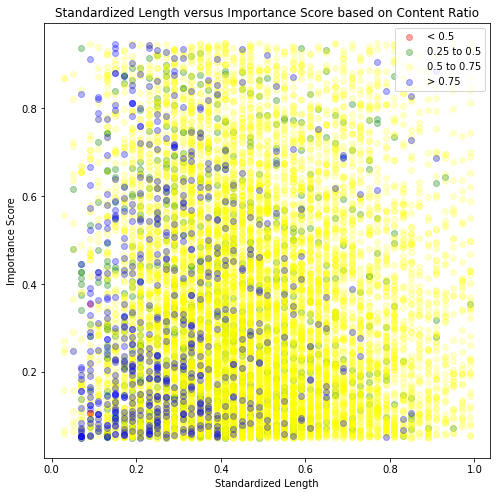

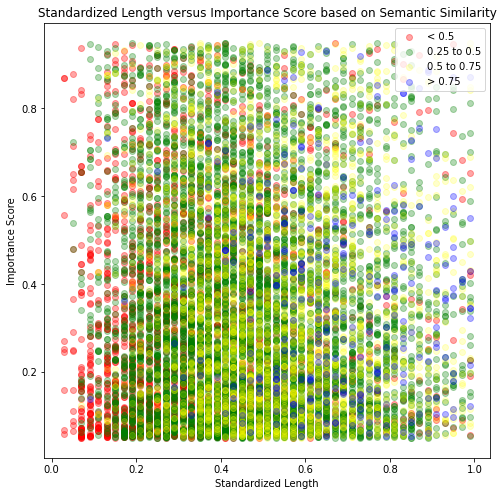

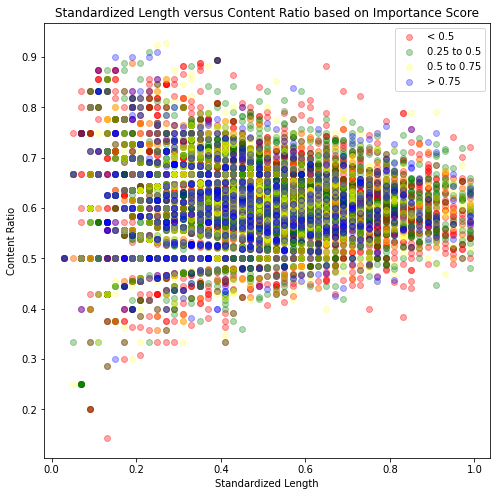

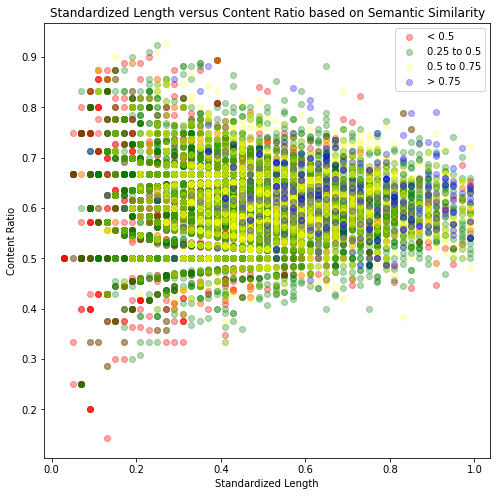

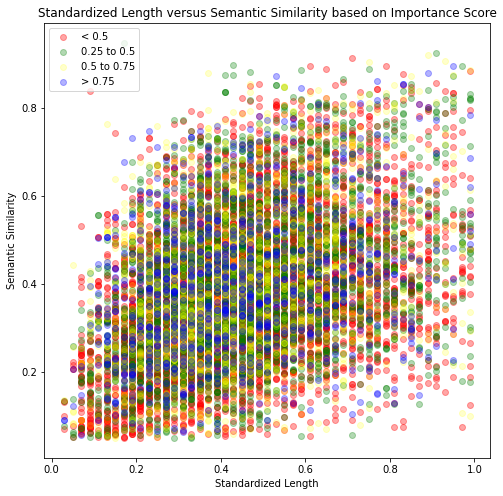

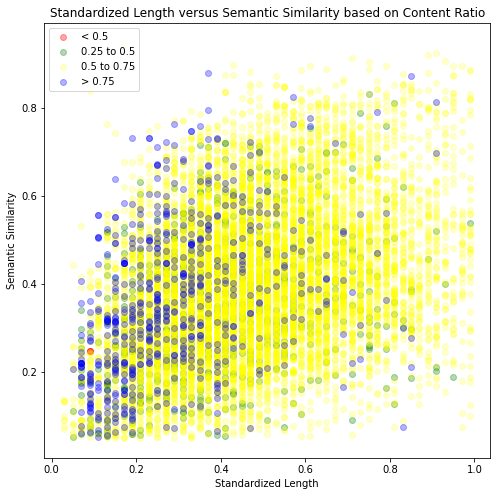

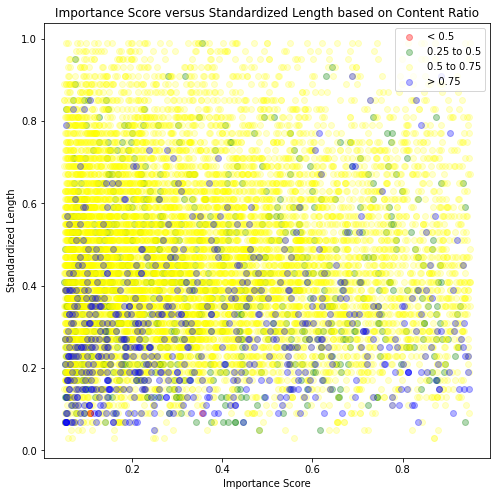

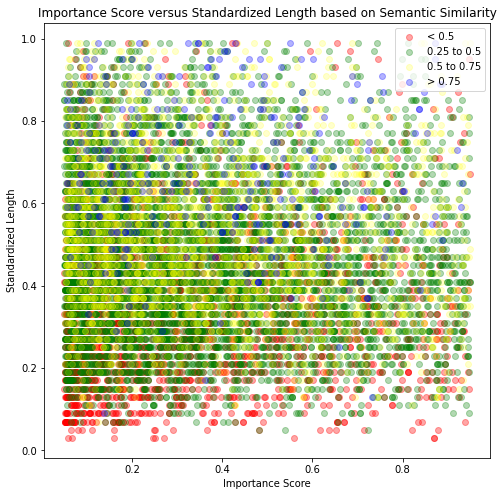

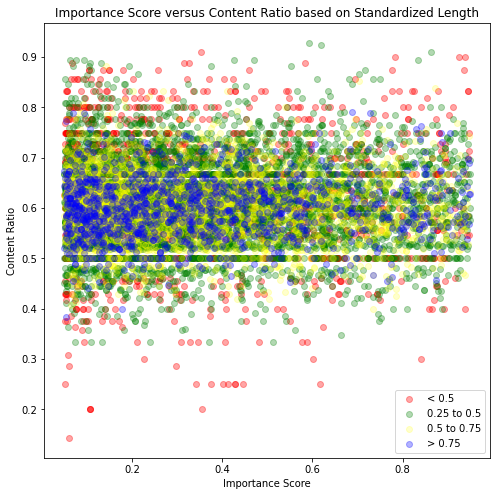

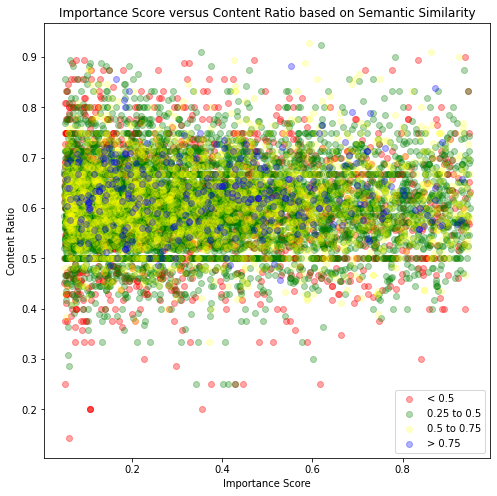

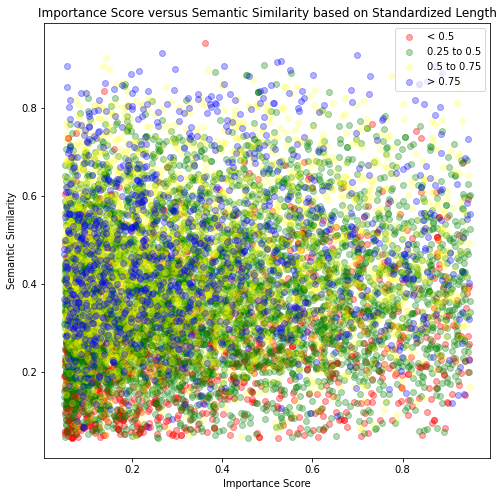

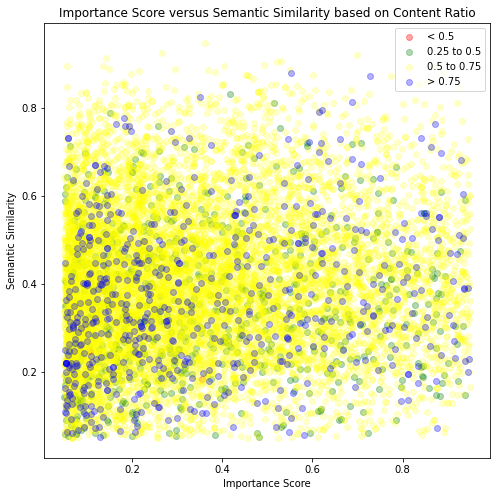

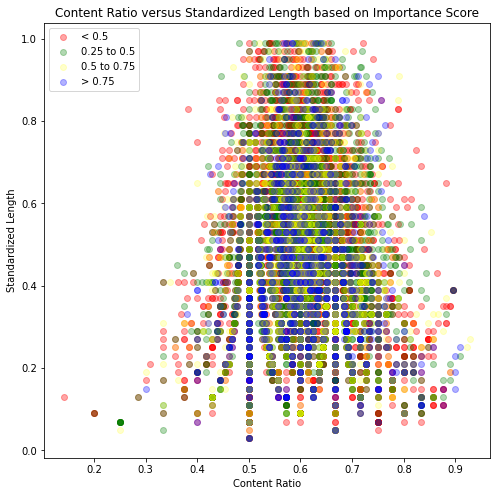

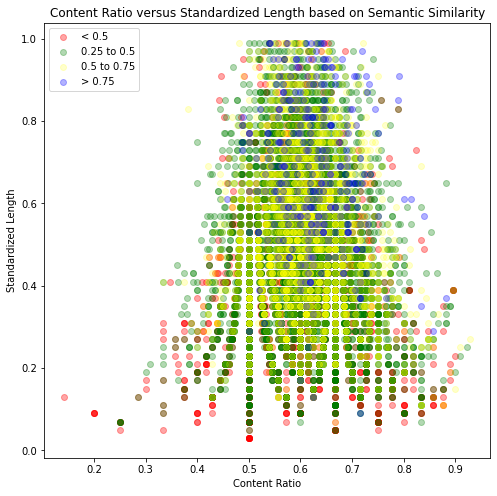

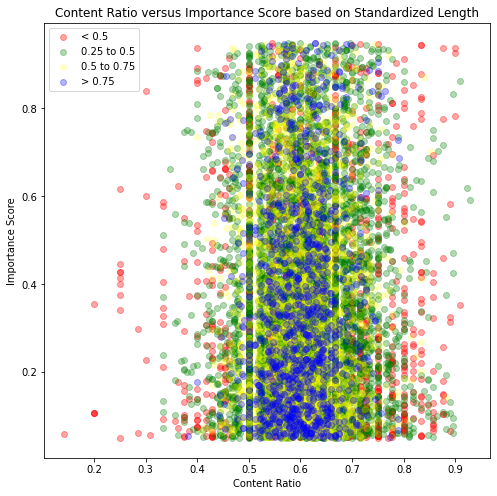

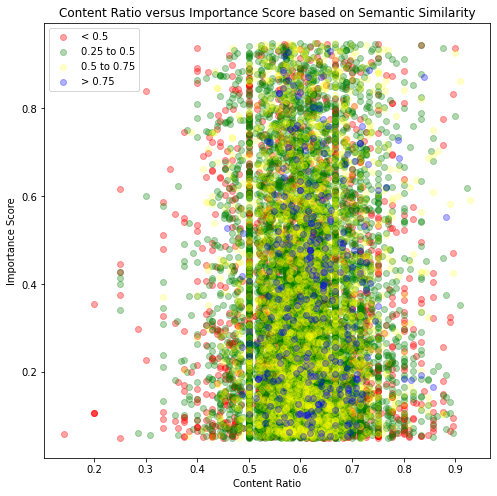

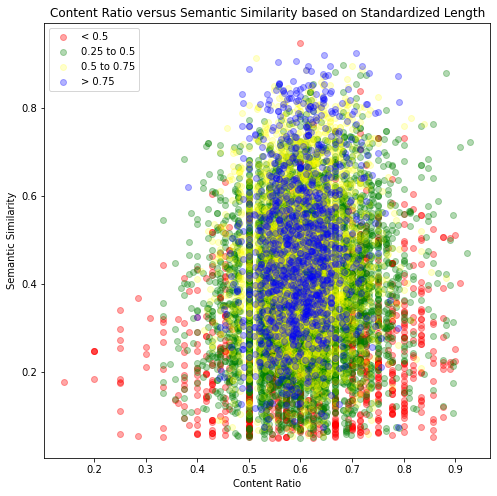

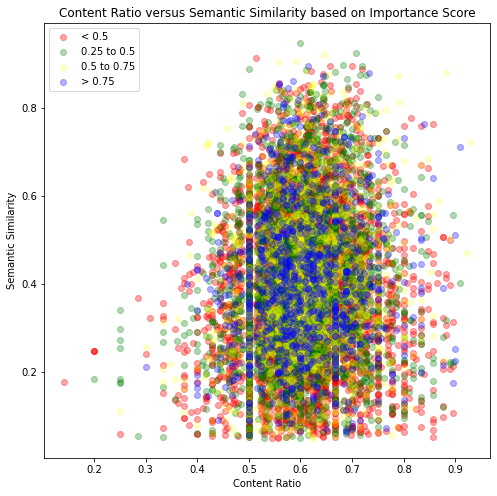

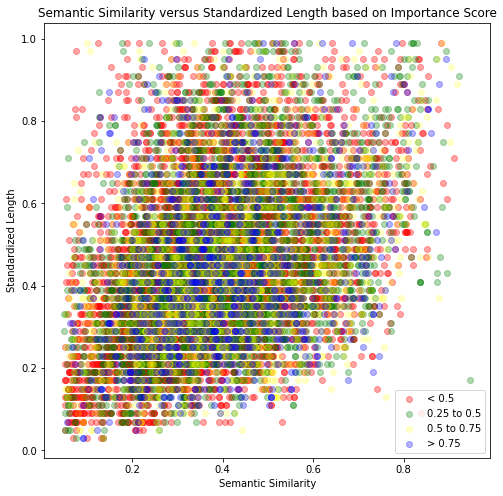

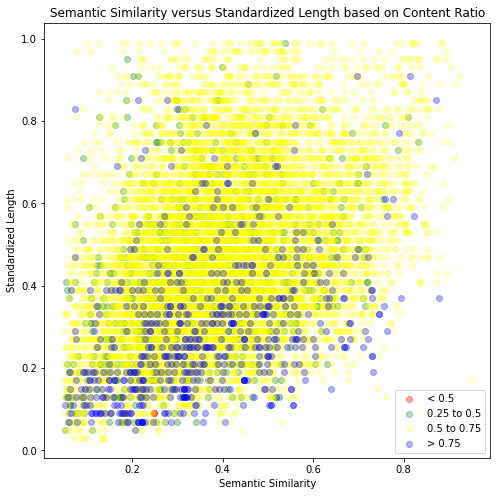

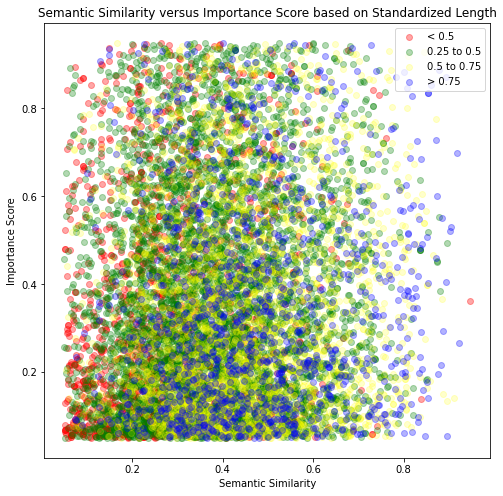

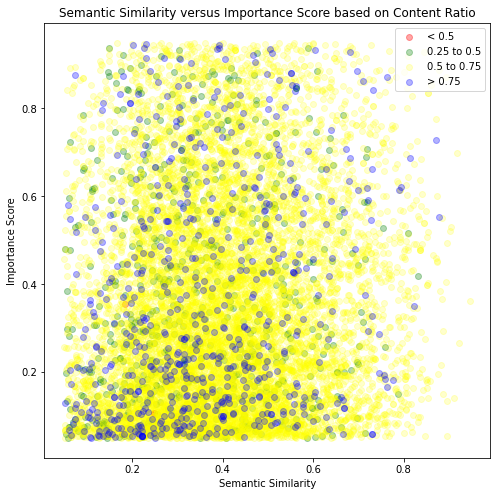

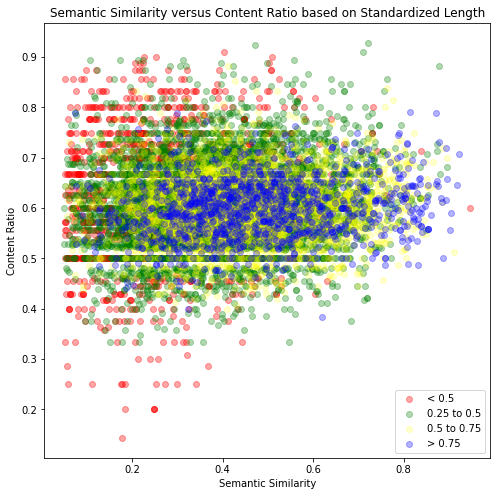

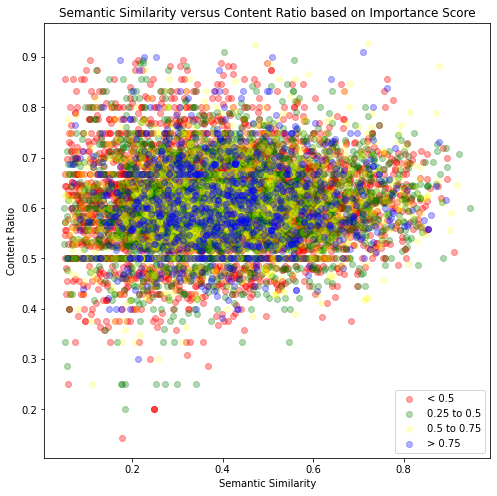

In [13]:
# Visualizing all plots

map_names = {1: 'Standardized Length', 2: 'Importance Score', 3: 'Content Ratio', 4: 'Semantic Similarity'}
map_lists = {1: lengths, 2: scores, 3: content_ratios, 4: similarity}
value_range = [1, 2, 3, 4]

for i in value_range:
    for j in value_range:
        if i == j:
            continue
        for k in value_range:
            if k == i or k == j:
                continue
            make_plot(map_lists[i], map_lists[j], map_lists[k], map_names[i], map_names[j], map_names[k])

In [14]:
# ^_^ Thank You